# spam classifier - Codeclause 

Farhan M

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [32]:
dat= pd.read_csv('C:/Users/Farhan/Documents/python jupyter/Datasets/spam.csv',encoding="ISO-8859-1")

In [33]:
dat.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [35]:
dat.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [36]:
dat.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [37]:
dat.isna().mean()

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [38]:
dat.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=0,inplace=True)

In [39]:
dat

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [40]:
dat.isnull().sum()

v1    0
v2    0
dtype: int64

In [41]:
dat.columns=['spam/ham','email']

In [42]:
dat.loc[dat['spam/ham'] == 'spam','spam/ham',] = 0
dat.loc[dat['spam/ham'] == 'ham','spam/ham',] = 1

In [43]:
#checking
dat

,spam/ham,email
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [44]:
#training the model with the dataset
x=dat.email
print('X values\n\n',x,'\n')
y=dat['spam/ham']
print('Y values\n\n',y)

X values

 0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: email, Length: 5572, dtype: object 

Y values

 0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: spam/ham, Length: 5572, dtype: object


In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=5)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_vec=TfidfVectorizer(stop_words='english',lowercase=True)
feature_vec

TfidfVectorizer(stop_words='english')

In [47]:
#as the values are in object we change it in int
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [48]:
x_train_vec=feature_vec.fit_transform(x_train)

In [49]:
x_test_vec=feature_vec.transform(x_test)

In [50]:
x_train

3507    Camera quite good, 10.1mega pixels, 3optical a...
1332            It's ok lar. U sleep early too... Nite...
4259        Are you plans with your family set in stone ?
1236                             How much are we getting?
2132    Your B4U voucher w/c 27/03 is MARSMS. Log onto...
                              ...                        
3046    Ok. Not much to do here though. H&M Friday, ca...
1725    You know there is. I shall speak to you in  &l...
4079    Sir, good morning. Hope you had a good weekend...
2254                              Ok. Me watching tv too.
2915      What time should I tell my friend to be around?
Name: email, Length: 3900, dtype: object

In [51]:
x_train_vec

<3900x7039 sparse matrix of type '<class 'numpy.float64'>'
	with 30666 stored elements in Compressed Sparse Row format>

In [52]:
x_test_vec

<1672x7039 sparse matrix of type '<class 'numpy.float64'>'
	with 11308 stored elements in Compressed Sparse Row format>

In [53]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(x_train_vec,y_train)

LogisticRegression()

In [54]:
lr.score(x_train_vec,y_train)

0.9669230769230769

In [55]:
lr.score(x_test_vec,y_test)

0.9671052631578947

In [56]:
pred_model=lr.predict(x_test_vec)
pred_model

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test,pred_model)

0.9671052631578947

In [58]:
conf_matrix=confusion_matrix(y_test,pred_model)

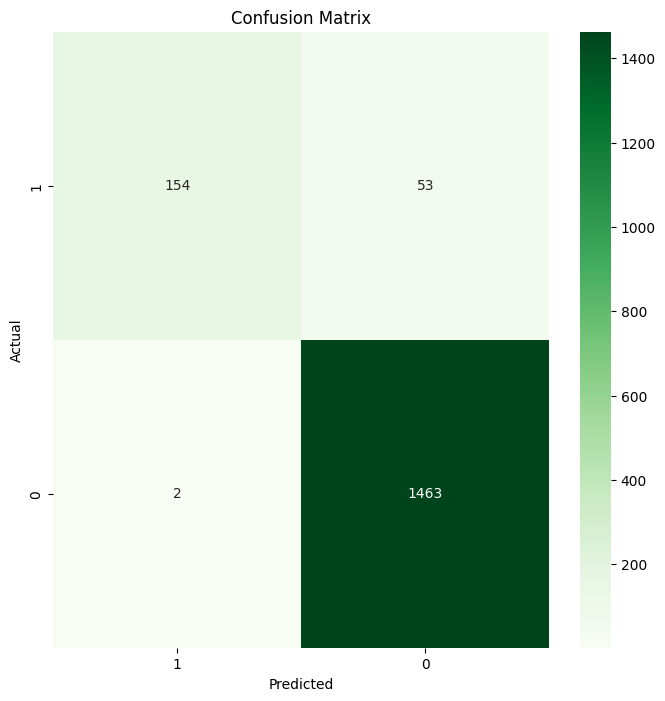

In [59]:
class_names = y.unique()
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

plt.figure(figsize=(8, 8))
sns.heatmap(df_cm, annot=True, cmap="Greens", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print(classification_report(y_test,pred_model))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       207
           1       0.97      1.00      0.98      1465

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.97      1672

